In [14]:
# load_data.py
import pandas as pd

# Load the dataset
data = pd.read_csv("fetal_health.csv")
print(data.head())
print(data.info())


   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

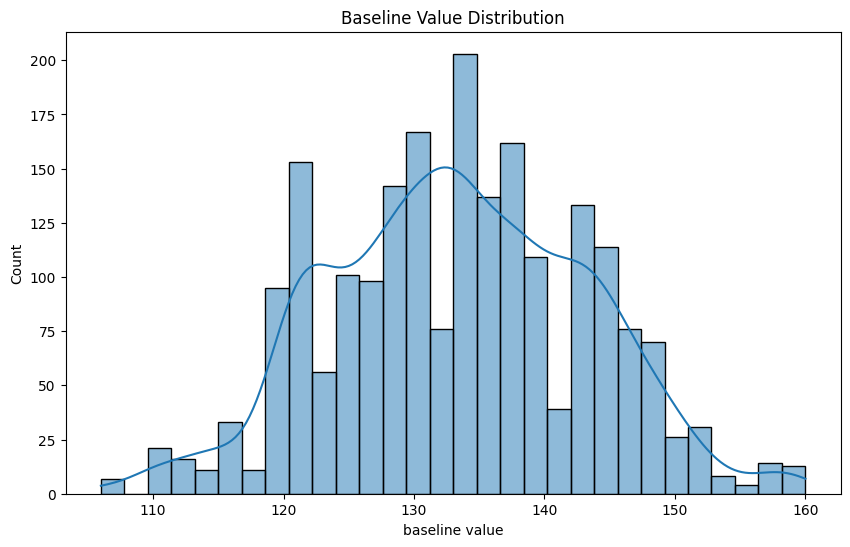

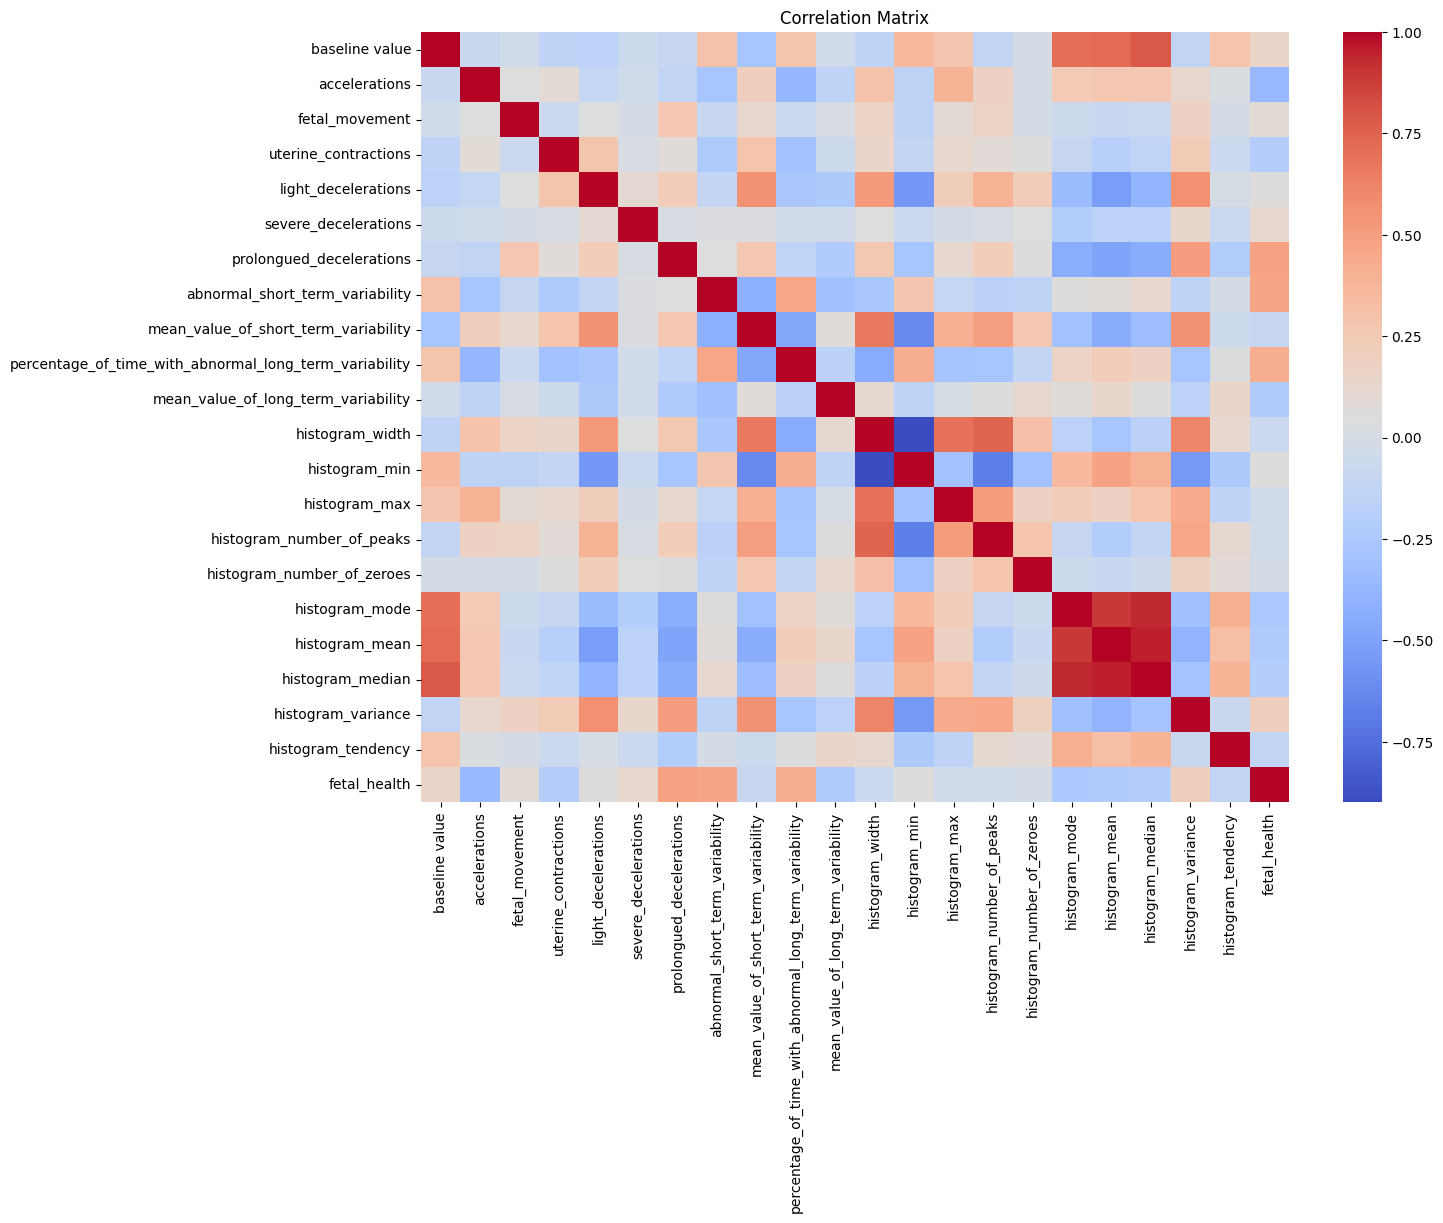

In [17]:
# descriptive_stats.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("fetal_health.csv")

# Summary stats
print(data.describe())

# Class distribution
print(data['fetal_health'].value_counts())

# Histogram for baseline value
plt.figure(figsize=(10,6))
sns.histplot(data['baseline value'], bins=30, kde=True)
plt.title("Baseline Value Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [18]:
# inferential_tests.py
import pandas as pd
from scipy import stats

data = pd.read_csv("fetal_health.csv")

# t-test Normal vs Pathological
normal = data[data.fetal_health == 1]['baseline value']
pathological = data[data.fetal_health == 3]['baseline value']
t_stat, p_val = stats.ttest_ind(normal, pathological)
print(f"T-test Normal vs Pathological: t={t_stat:.3f}, p={p_val:.4f}")

# ANOVA across all 3 classes
f_stat, p_anova = stats.f_oneway(
    data[data.fetal_health == 1]['baseline value'],
    data[data.fetal_health == 2]['baseline value'], 
    data[data.fetal_health == 3]['baseline value']
)
print(f"ANOVA across all classes: F={f_stat:.3f}, p={p_anova:.4f}")

# Chi-square for baseline_group
data['baseline_group'] = pd.qcut(data['baseline value'], q=4, labels=False)
cont_table = pd.crosstab(data['baseline_group'], data['fetal_health'])
chi2, p_chi, dof, exp = stats.chi2_contingency(cont_table)
print(f"Chi2 Test: χ2={chi2:.3f}, p={p_chi:.4f}")


T-test Normal vs Pathological: t=0.393, p=0.6945
ANOVA across all classes: F=140.621, p=0.0000
Chi2 Test: χ2=281.072, p=0.0000


              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       496
         2.0       0.68      0.62      0.65       101
         3.0       0.65      0.83      0.73        41

    accuracy                           0.88       638
   macro avg       0.76      0.80      0.78       638
weighted avg       0.88      0.88      0.88       638



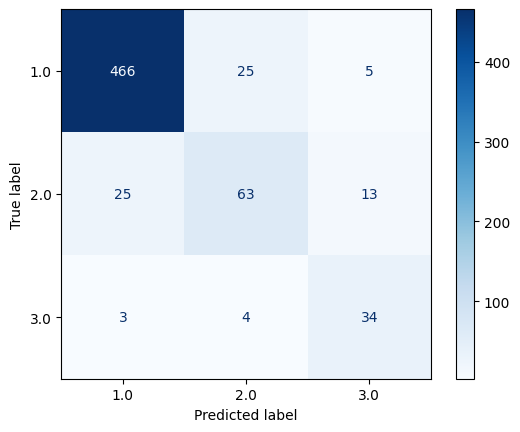

In [23]:
# model_training.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = pd.read_csv("fetal_health.csv")
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.show()


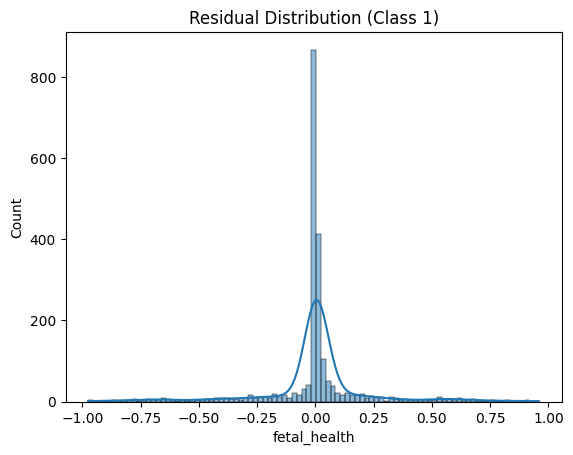

In [25]:
# diagnostics.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("fetal_health.csv")
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_scaled, y)

# Residuals for class 1
y_probs = clf.predict_proba(X_scaled)
resid = (y == 1) - y_probs[:,0]
plt.figure()
sns.histplot(resid, kde=True)
plt.title("Residual Distribution (Class 1)")
plt.show()
